<a href="https://colab.research.google.com/github/XueMei-L/Trabajo-Fin-de-Grado/blob/main/TFG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

------------------------TRABAJO FIN DE GRADO------------------------

GRADO EN INGENIERÍA INFORMÁTICA

CURSO ACADÉMICO 2023-2024

CONVOCATORIA JUNIO

TÍTULO: DATA SCIENCE EN SECTOR HOTELERO

AUTOR: XUEMEI LIN

TUTOR: SERGIO DÍAZ GONZÁLEZ

------------------------TRABAJO FIN DE GRADO------------------------

# Añalisis y preparación de datos



In [389]:
# Librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [390]:
# importar datos del numero de pasajeros estancias en el hotel
data = pd.read_csv('./pax_hotel.csv')

# convertir pax en int entero
data.isetitem(1, data[data.columns[1]].astype(int)) # create pax_estancias a new column with int type
data.isetitem(2, data[data.columns[2]].astype(int)) # create pax_estancias a new column with int type
data.isetitem(3, data[data.columns[3]].astype(int)) # create pax_estancias a new column with int type
data.isetitem(5, data[data.columns[5]].astype(int)) # create pax_estancias a new column with int type

# Display all rows
pd.set_option('display.max_rows', 10)

print(data)

      Unnamed: 0   AÑO  MES  DIA  Fecha_Foto  PAX_ESTANCIAS
0              0  2022    4    6  15-02-2024           1640
1              1  2022    4    7  15-02-2024           1732
2              2  2022    4    8  15-02-2024           1742
3              3  2022    4    9  15-02-2024           1807
4              4  2022    4   10  15-02-2024           1840
...          ...   ...  ...  ...         ...            ...
996          996  2024   12   27  15-02-2024            762
997          997  2024   12   28  15-02-2024            875
998          998  2024   12   29  15-02-2024            818
999          999  2024   12   30  15-02-2024            710
1000        1000  2024   12   31  15-02-2024            669

[1001 rows x 6 columns]


In [391]:
# data to DataFrame
df = pd.DataFrame(data)
df

,Unnamed: 0,AÑO,MES,DIA,Fecha_Foto,PAX_ESTANCIAS
0,0,2022,4,6,15-02-2024,1640
1,1,2022,4,7,15-02-2024,1732
2,2,2022,4,8,15-02-2024,1742
3,3,2022,4,9,15-02-2024,1807
4,4,2022,4,10,15-02-2024,1840
...,...,...,...,...,...,...
996,996,2024,12,27,15-02-2024,762
997,997,2024,12,28,15-02-2024,875
998,998,2024,12,29,15-02-2024,818
999,999,2024,12,30,15-02-2024,710


In [392]:
# Convertir 'DIA', 'MES', and 'AÑO' columnas en datatime
data['Date'] = pd.to_datetime(data['AÑO']*10000 + data['MES']*100 + data['DIA'], format='%Y%m%d')

# Insertar la nueva columna en indice = 2
data.insert(2, 'datetime', data['Date'])

# Eliminar columnas inecesarias
data.drop(columns=['AÑO', 'MES', 'DIA', 'Date', 'Fecha_Foto','Unnamed: 0'], inplace=True)

# Mostrar dataframe
data

,datetime,PAX_ESTANCIAS
0,2022-04-06,1640
1,2022-04-07,1732
2,2022-04-08,1742
3,2022-04-09,1807
4,2022-04-10,1840
...,...,...
996,2024-12-27,762
997,2024-12-28,875
998,2024-12-29,818
999,2024-12-30,710


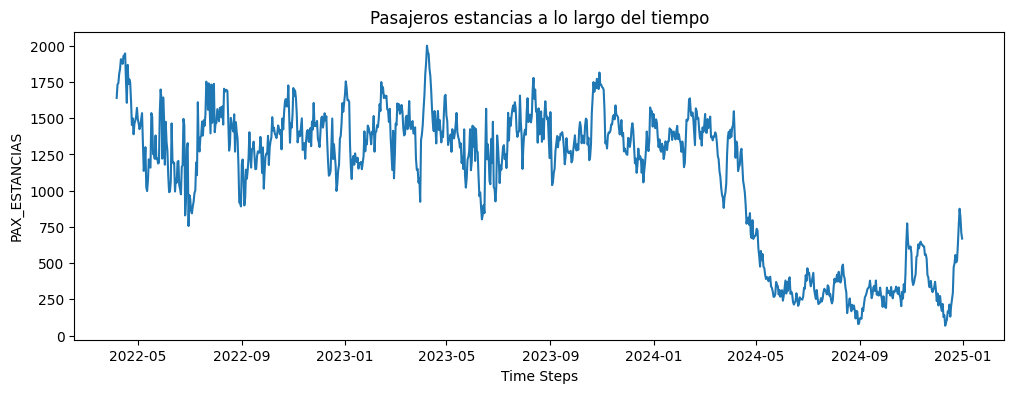

In [393]:
# Mostrar grafica de datos
plt.figure(figsize=(12, 4))
plt.plot(data['datetime'], data['PAX_ESTANCIAS'])
plt.xlabel('Time Steps')
plt.ylabel('PAX_ESTANCIAS')
plt.title('Pasajeros estancias a lo largo del tiempo')
plt.show()

In [394]:
# Filtra el DataFrame para incluir solo las filas con fecha hasta 2024-02-15
data = data[data['datetime'] <= '2024-02-15']

data

,datetime,PAX_ESTANCIAS
0,2022-04-06,1640
1,2022-04-07,1732
2,2022-04-08,1742
3,2022-04-09,1807
4,2022-04-10,1840
...,...,...
676,2024-02-11,1497
677,2024-02-12,1629
678,2024-02-13,1637
679,2024-02-14,1545


Ingeniería de características - Temperatura de Tenerife

In [395]:
# Load Tenerife´s weather csv
weatherTNF = pd.read_csv('./weather_TF.csv', delimiter=';', skipinitialspace=True)

In [396]:
# Count NaN values per column
nan_count_by_column = weatherTNF.isna().sum()
print("Count of NaN values per column:")
print(nan_count_by_column)

Count of NaN values per column:
datetime    0
T.Máx       5
T.Mín       5
dtype: int64


In [397]:
# Iterate through each row in the DataFrame
for i, row in weatherTNF.iterrows():
    # If the index is 0 (first row) and both 'T.Máx' and 'T.Mín' are NaN, adopt the next row's values
    if i == 0 and pd.isna(row['T.Máx']) and pd.isna(row['T.Mín']):
        weatherTNF.loc[i, 'T.Máx'] = weatherTNF.loc[i+1, 'T.Máx']
        weatherTNF.loc[i, 'T.Mín'] = weatherTNF.loc[i+1, 'T.Mín']
    # If the index is the last row and both 'T.Máx' and 'T.Mín' are NaN, adopt the previous row's values
    elif i == weatherTNF.index.size - 1 and pd.isna(row['T.Máx']) and pd.isna(row['T.Mín']):
        weatherTNF.loc[i, 'T.Máx'] = weatherTNF.loc[i-1, 'T.Máx']
        weatherTNF.loc[i, 'T.Mín'] = weatherTNF.loc[i-1, 'T.Mín']
    # If any row in the middle has NaN for both 'T.Máx' and 'T.Mín', replace with the average of the previous and next rows
    elif pd.isna(row['T.Máx']) and pd.isna(row['T.Mín']):
        weatherTNF.loc[i, 'T.Máx'] = (weatherTNF.loc[i-1, 'T.Máx'] + weatherTNF.loc[i+1, 'T.Máx']) / 2
        weatherTNF.loc[i, 'T.Mín'] = (weatherTNF.loc[i-1, 'T.Mín'] + weatherTNF.loc[i+1, 'T.Mín']) / 2

# Convert 'datetime' column to datetime format if it exists
if 'datetime' in weatherTNF.columns:
    weatherTNF['datetime'] = pd.to_datetime(weatherTNF['datetime'], format='%d/%m/%Y')

# Convert the modified DataFrame into a new DataFrame
tempTNF = pd.DataFrame(weatherTNF)

# Calculate the average temperature and save it in a new column 'TempAverageTNF'
tempTNF['TempAverageTNF'] = ((tempTNF['T.Máx'] + tempTNF['T.Mín']) / 2).round(1)

# Drop the original 'T.Máx' and 'T.Mín' columns from the DataFrame
tempTNF = tempTNF.drop(columns=['T.Máx', 'T.Mín'])

# Display the modified DataFrame
tempTNF

,datetime,TempAverageTNF
0,2022-04-06,17.6
1,2022-04-07,17.6
2,2022-04-08,18.7
3,2022-04-09,18.2
4,2022-04-10,17.8
...,...,...
674,2024-02-11,20.3
675,2024-02-12,20.6
676,2024-02-13,21.6
677,2024-02-14,20.4


In [398]:
# Count NaN values per column
nan_count_by_column = weatherTNF.isna().sum()
print("Count of NaN values per column:")
print(nan_count_by_column)

Count of NaN values per column:
datetime    0
T.Máx       0
T.Mín       0
dtype: int64


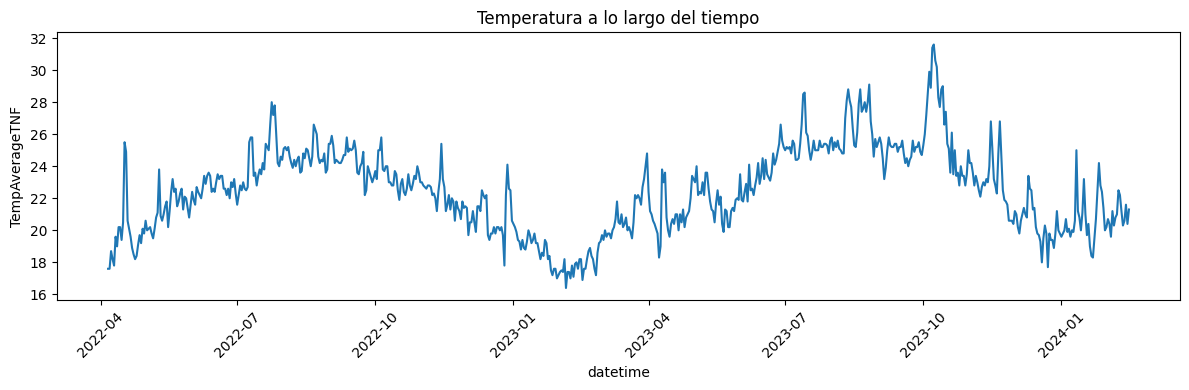

In [399]:
# Show grafic
plt.figure(figsize=(12, 4))
plt.plot(tempTNF['datetime'], tempTNF['TempAverageTNF'])
plt.xlabel('datetime')  # Update xlabel to 'Fecha' for 'datetime'
plt.ylabel('TempAverageTNF')
plt.title('Temperatura a lo largo del tiempo')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Ingeniería de características - Temperatura de Reino Unido y Alemania

In [400]:
weatherUK = pd.read_csv('./weather_UK.csv', delimiter=';', skipinitialspace=True)
weatherDE = pd.read_csv('./weather_DE.csv', delimiter=';', skipinitialspace=True)

In [401]:
# Count NaN values per column weatherUK
nan_count_by_column = weatherDE.isna().sum()
print("Count of NaN values per column:")
print(nan_count_by_column)

# Count NaN values per column weatherDE
nan_count_by_column = weatherDE.isna().sum()
print("Count of NaN values per column:")
print(nan_count_by_column)

Count of NaN values per column:
name        0
datetime    0
tempmax     0
tempmin     0
temp        0
tempC_DE    0
dtype: int64
Count of NaN values per column:
name        0
datetime    0
tempmax     0
tempmin     0
temp        0
tempC_DE    0
dtype: int64


In [402]:
# Delete the 'tempmax', 'tempmin', and 'other' columns
weatherDE.drop(columns=['name','tempmax', 'tempmin', 'temp'], inplace=True)

# Convert 'datetime' column to datetime format if it exists
if 'datetime' in weatherDE.columns:
    weatherDE['datetime'] = pd.to_datetime(weatherDE['datetime'], format='%d/%m/%Y')

# Convert the modified DataFrame into a new DataFrame
temp_DE = pd.DataFrame(weatherDE)
temp_DE

,datetime,tempC_DE
0,2022-04-06,10.3
1,2022-04-07,10.4
2,2022-04-08,7.1
3,2022-04-09,5.6
4,2022-04-10,4.9
...,...,...
677,2024-02-12,7.2
678,2024-02-13,5.7
679,2024-02-14,5.9
680,2024-02-15,11.1


In [403]:
# Delete the 'tempmax', 'tempmin', and 'other' columns
weatherUK.drop(columns=['name','tempmax', 'tempmin', 'temp'], inplace=True)

# Convert 'datetime' column to datetime format if it exists
if 'datetime' in weatherUK.columns:
    weatherUK['datetime'] = pd.to_datetime(weatherUK['datetime'], format='%d/%m/%Y')

# Convert the modified DataFrame into a new DataFrame
temp_UK = pd.DataFrame(weatherUK)
temp_UK

,datetime,tempC_UK
0,2022-04-06,11.0
1,2022-04-07,10.2
2,2022-04-08,7.4
3,2022-04-09,7.9
4,2022-04-10,9.0
...,...,...
677,2024-02-12,6.7
678,2024-02-13,8.6
679,2024-02-14,12.7
680,2024-02-15,13.9


In [404]:
# Merge DataFrames on datetime
tempUK_DE = pd.merge(temp_DE, temp_UK, on='datetime', suffixes=('_DE', '_UK'))

tempUK_DE

,datetime,tempC_DE,tempC_UK
0,2022-04-06,10.3,11.0
1,2022-04-07,10.4,10.2
2,2022-04-08,7.1,7.4
3,2022-04-09,5.6,7.9
4,2022-04-10,4.9,9.0
...,...,...,...
677,2024-02-12,7.2,6.7
678,2024-02-13,5.7,8.6
679,2024-02-14,5.9,12.7
680,2024-02-15,11.1,13.9


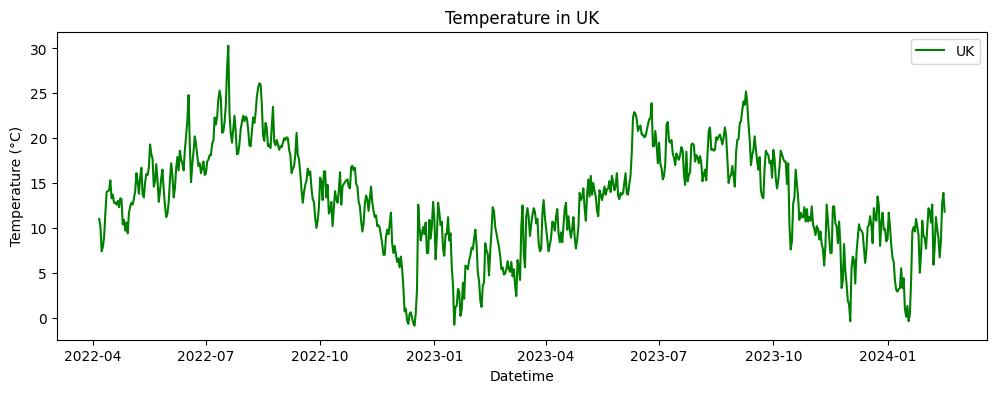

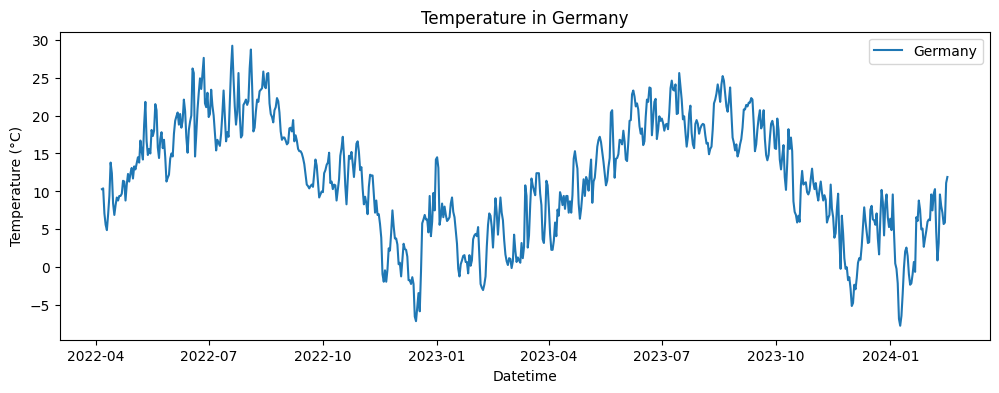

In [405]:
# Set up figure and axis for the UK
plt.figure(figsize=(12, 4))
plt.plot(temp_UK['datetime'], temp_UK['tempC_UK'], label='UK', color='green')
plt.xlabel('Datetime')
plt.ylabel('Temperature (°C)')
plt.title('Temperature in UK')
plt.legend()
plt.show()

# Set up figure and axis for Germany
plt.figure(figsize=(12, 4))
plt.plot(temp_DE['datetime'], temp_DE['tempC_DE'], label='Germany')
plt.xlabel('Datetime')
plt.ylabel('Temperature (°C)')
plt.title('Temperature in Germany')
plt.legend()
plt.show()

In [406]:
# Merge DataFrames on the 'datetime' column
data = pd.merge(data, tempTNF, on='datetime')
data = pd.merge(data, tempUK_DE, on='datetime')

data

,datetime,PAX_ESTANCIAS,TempAverageTNF,tempC_DE,tempC_UK
0,2022-04-06,1640,17.6,10.3,11.0
1,2022-04-07,1732,17.6,10.4,10.2
2,2022-04-08,1742,18.7,7.1,7.4
3,2022-04-09,1807,18.2,5.6,7.9
4,2022-04-10,1840,17.8,4.9,9.0
...,...,...,...,...,...
674,2024-02-11,1497,20.3,8.1,8.9
675,2024-02-12,1629,20.6,7.2,6.7
676,2024-02-13,1637,21.6,5.7,8.6
677,2024-02-14,1545,20.4,5.9,12.7


Ingeniería de características - Días vacacionales

In [407]:
# Calculate the week number
data.loc[:, 'Week'] = data['datetime'].dt.dayofweek + 1

# Create a new column 'Holiday' based on the day of the week
data.loc[:, 'Holidays'] = data['Week'].apply(lambda x: 0 if x < 6 else 1)

data

,datetime,PAX_ESTANCIAS,TempAverageTNF,tempC_DE,tempC_UK,Week,Holidays
0,2022-04-06,1640,17.6,10.3,11.0,3,0
1,2022-04-07,1732,17.6,10.4,10.2,4,0
2,2022-04-08,1742,18.7,7.1,7.4,5,0
3,2022-04-09,1807,18.2,5.6,7.9,6,1
4,2022-04-10,1840,17.8,4.9,9.0,7,1
...,...,...,...,...,...,...,...
674,2024-02-11,1497,20.3,8.1,8.9,7,1
675,2024-02-12,1629,20.6,7.2,6.7,1,0
676,2024-02-13,1637,21.6,5.7,8.6,2,0
677,2024-02-14,1545,20.4,5.9,12.7,3,0


In [408]:
UK_Holidays = [
        "01/01/2022",  # New Year's Day (Saturday)
        "03/01/2022",  # New Year's Day holiday (Monday)
        "04/01/2022",  # New Year's holiday (Scotland) (Tuesday)
        "17/03/2022",  # St Patrick's Day (Northern Ireland) (Thursday)
        "15/04/2022",  # Good Friday (Friday)
        "18/04/2022",  # Easter Monday (Monday)
        "02/05/2022",  # May Day bank holiday (Monday)
        "02/06/2022",  # Spring Bank Holiday (Thursday)
        "03/06/2022",  # Platinum Jubilee Bank Holiday (Friday)
        "12/07/2022",  # Battle of the Boyne (Northern Ireland) (Tuesday)
        "01/08/2022",  # Summer Bank Holiday (Scotland only) (Monday)
        "29/08/2022",  # Summer Bank Holiday (not in Scotland) (Monday)
        "30/11/2022",  # St Andrew's Day (Scotland) (Wednesday)
        "25/12/2022",  # Christmas Day (Sunday)
        "26/12/2022",  # Boxing Day (Monday)
        "02/01/2023",  # New Year's Day
        "03/01/2023",  # Second Day of the New Year
        "07/04/2023",  # Good Friday
        "01/05/2023",  # Early May Bank Holiday
        "08/05/2023",  # Coronation of King Charles
        "29/05/2023",  # Spring Bank Holiday
        "07/08/2023",  # Summer Bank Holiday
        "30/11/2023",  # Saint Andrew's Day
        "25/12/2023",  # Christmas Day
        "26/12/2023",  # Boxing Day
        "01/01/2024",  # New Year's Day
        "02/01/2024",  # Second Day of the New Year
        "19/04/2024",  # Good Friday
        "06/05/2024",  # Early May Bank Holiday
        "20/05/2024",  # Spring Bank Holiday
        "03/06/2024",  # Platinum Jubilee Bank Holiday
        "26/08/2024",  # Summer Bank Holiday
        "30/11/2024",  # Saint Andrew's Day
        "25/12/2024",  # Christmas Day
        "26/12/2024"   # Boxing Day
    ]

# Convert UK holidays to datetime format
UK_Holidays = pd.to_datetime(UK_Holidays, format='%d/%m/%Y')

# Set 'Holiday' column based on whether the date is a holiday
data['UKHolidays'] = data['datetime'].isin(UK_Holidays).astype(int)

data

,datetime,PAX_ESTANCIAS,TempAverageTNF,tempC_DE,tempC_UK,Week,Holidays,UKHolidays
0,2022-04-06,1640,17.6,10.3,11.0,3,0,0
1,2022-04-07,1732,17.6,10.4,10.2,4,0,0
2,2022-04-08,1742,18.7,7.1,7.4,5,0,0
3,2022-04-09,1807,18.2,5.6,7.9,6,1,0
4,2022-04-10,1840,17.8,4.9,9.0,7,1,0
...,...,...,...,...,...,...,...,...
674,2024-02-11,1497,20.3,8.1,8.9,7,1,0
675,2024-02-12,1629,20.6,7.2,6.7,1,0,0
676,2024-02-13,1637,21.6,5.7,8.6,2,0,0
677,2024-02-14,1545,20.4,5.9,12.7,3,0,0


In [409]:
DE_Holidays = [
    # 2022
    "01/01/2022",  # New Year's Day (Saturday)
    "06/01/2022",  # Epiphany (Thursday, Baden-Württemberg, Bavaria, Saxony-Anhalt)
    "08/03/2022",  # International Women's Day (Tuesday, Berlin, Mecklenburg-Vorpommern)
    "15/04/2022",  # Good Friday (Friday)
    "18/04/2022",  # Easter Monday (Monday)
    "01/05/2022",  # Labor Day (Sunday)
    "26/05/2022",  # Ascension Day (Thursday)
    "06/06/2022",  # Whit Monday (Monday)
    "16/06/2022",  # Corpus Christi (Thursday, Baden-Württemberg, Bavaria, Hesse, North Rhine-Westphalia, Rhineland-Palatinate, Saarland, parts of Saxony and Thuringia)
    "08/08/2022",  # Peace Festival (Monday, Bavaria - Augsburg)
    "15/08/2022",  # Assumption Day (Monday, Saarland, parts of Bavaria)
    "20/09/2022",  # World Children's Day (Tuesday, Thuringia)
    "03/10/2022",  # Day of German Unity (Monday)
    "31/10/2022",  # Reformation Day (Monday, Brandenburg, Mecklenburg-Western Pomerania, Saxony, Saxony-Anhalt, parts of Thuringia)
    "01/11/2022",  # All Saints' Day (Tuesday, Baden-Württemberg, Bavaria, North Rhine-Westphalia, Rhineland-Palatinate, Saarland)
    "16/11/2022",  # Day of Prayer and Repentance (Wednesday, Saxony)
    "25/12/2022",  # Christmas Day (Sunday)
    "26/12/2022",  # Saint Stephen's Day (Monday)

    # 2023
    "01/01/2023",  # New Year's Day (Sunday)
    "06/01/2023",  # Epiphany (Friday, Baden-Württemberg, Bavaria, Saxony-Anhalt)
    "08/03/2023",  # International Women's Day (Wednesday, Berlin, Mecklenburg-Vorpommern)
    "07/04/2023",  # Good Friday (Friday)
    "10/04/2023",  # Easter Monday (Monday)
    "01/05/2023",  # Labor Day (Monday)
    "18/05/2023",  # Ascension Day (Thursday)
    "29/05/2023",  # Whit Monday (Monday)
    "08/06/2023",  # Corpus Christi (Thursday, Baden-Württemberg, Bavaria, Hesse, North Rhine-Westphalia, Rhineland-Palatinate, Saarland, parts of Saxony and Thuringia)
    "08/08/2023",  # Peace Festival (Tuesday, Bavaria - Augsburg)
    "15/08/2023",  # Assumption Day (Tuesday, Saarland, parts of Bavaria)
    "20/09/2023",  # World Children's Day (Wednesday, Thuringia)
    "03/10/2023",  # Day of German Unity (Tuesday)
    "31/10/2023",  # Reformation Day (Tuesday, Brandenburg, Mecklenburg-Western Pomerania, Saxony, Saxony-Anhalt, parts of Thuringia)
    "01/11/2023",  # All Saints' Day (Wednesday, Baden-Württemberg, Bavaria, North Rhine-Westphalia, Rhineland-Palatinate, Saarland)
    "22/11/2023",  # Day of Prayer and Repentance (Wednesday, Saxony)
    "25/12/2023",  # Christmas Day (Monday)
    "26/12/2023",  # Saint Stephen's Day (Tuesday)

    # 2024
    "01/01/2024",  # New Year's Day (Monday)
    "06/01/2024",  # Epiphany (Saturday, Baden-Württemberg, Bavaria, Saxony-Anhalt)
    "08/03/2024",  # International Women's Day (Friday, Berlin, Mecklenburg-Vorpommern)
    "29/03/2024",  # Good Friday (Friday)
    "01/04/2024",  # Easter Monday (Monday)
    "01/05/2024",  # Labor Day (Wednesday)
    "09/05/2024",  # Ascension Day (Thursday)
    "20/05/2024",  # Whit Monday (Monday)
    "30/05/2024",  # Corpus Christi (Thursday, Baden-Württemberg, Bavaria, Hesse, North Rhine-Westphalia, Rhineland-Palatinate, Saarland, parts of Saxony and Thuringia)
    "08/08/2024",  # Peace Festival (Thursday, Bavaria - Augsburg)
    "15/08/2024",  # Assumption Day (Thursday, Saarland, parts of Bavaria)
    "20/09/2024",  # World Children's Day (Friday, Thuringia)
    "03/10/2024",  # Day of German Unity (Thursday)
    "31/10/2024",  # Reformation Day (Thursday, Brandenburg, Mecklenburg-Western Pomerania, Saxony, Saxony-Anhalt, parts of Thuringia)
    "01/11/2024",  # All Saints' Day (Friday, Baden-Württemberg, Bavaria, North Rhine-Westphalia, Rhineland-Palatinate, Saarland)
    "20/11/2024",  # Day of Prayer and Repentance (Wednesday, Saxony)
    "25/12/2024",  # Christmas Day (Wednesday)
    "26/12/2024",  # Saint Stephen's Day (Thursday)
]

# Convert UK holidays to datetime format
DE_Holidays = pd.to_datetime(UK_Holidays, format='%d/%m/%Y')

# Set 'Holiday' column based on whether the date is a holiday
data['DEHolidays'] = data['datetime'].isin(UK_Holidays).astype(int)

data

,datetime,PAX_ESTANCIAS,TempAverageTNF,tempC_DE,tempC_UK,Week,Holidays,UKHolidays,DEHolidays
0,2022-04-06,1640,17.6,10.3,11.0,3,0,0,0
1,2022-04-07,1732,17.6,10.4,10.2,4,0,0,0
2,2022-04-08,1742,18.7,7.1,7.4,5,0,0,0
3,2022-04-09,1807,18.2,5.6,7.9,6,1,0,0
4,2022-04-10,1840,17.8,4.9,9.0,7,1,0,0
...,...,...,...,...,...,...,...,...,...
674,2024-02-11,1497,20.3,8.1,8.9,7,1,0,0
675,2024-02-12,1629,20.6,7.2,6.7,1,0,0,0
676,2024-02-13,1637,21.6,5.7,8.6,2,0,0,0
677,2024-02-14,1545,20.4,5.9,12.7,3,0,0,0


In [410]:
# Combine the columns into a single 'Holiday' column
data['Holidays'] = data[['Holidays', 'UKHolidays', 'DEHolidays']].any(axis=1).astype(int)

# Drop the individual holiday columns if they are no longer needed
data.drop(columns=['UKHolidays', 'DEHolidays'], inplace=True)

# Display all rows
pd.set_option('display.max_rows', 10)

data

,datetime,PAX_ESTANCIAS,TempAverageTNF,tempC_DE,tempC_UK,Week,Holidays
0,2022-04-06,1640,17.6,10.3,11.0,3,0
1,2022-04-07,1732,17.6,10.4,10.2,4,0
2,2022-04-08,1742,18.7,7.1,7.4,5,0
3,2022-04-09,1807,18.2,5.6,7.9,6,1
4,2022-04-10,1840,17.8,4.9,9.0,7,1
...,...,...,...,...,...,...,...
674,2024-02-11,1497,20.3,8.1,8.9,7,1
675,2024-02-12,1629,20.6,7.2,6.7,1,0
676,2024-02-13,1637,21.6,5.7,8.6,2,0
677,2024-02-14,1545,20.4,5.9,12.7,3,0


In [411]:
# Marcar los días vacacionales de verano (15 de junio a 1 de septiembre)
data.loc[(data['datetime'].dt.month == 6) & (data['datetime'].dt.day >= 15) |
       (data['datetime'].dt.month == 7) |
       (data['datetime'].dt.month == 8) |
       ((data['datetime'].dt.month == 9) & (data['datetime'].dt.day <= 1)), 'Holidays'] = 1

# Marcar los días vacacionales de Navidad (20 de diciembre a 7 de enero del año siguiente)
data.loc[((data['datetime'].dt.month == 12) & (data['datetime'].dt.day >= 20)) |
       ((data['datetime'].dt.month == 1) & (data['datetime'].dt.day <= 7)), 'Holidays'] = 1

# Display all rows
pd.set_option('display.max_rows', None)

data

,datetime,PAX_ESTANCIAS,TempAverageTNF,tempC_DE,tempC_UK,Week,Holidays
0,2022-04-06,1640,17.6,10.3,11.0,3,0
1,2022-04-07,1732,17.6,10.4,10.2,4,0
2,2022-04-08,1742,18.7,7.1,7.4,5,0
3,2022-04-09,1807,18.2,5.6,7.9,6,1
4,2022-04-10,1840,17.8,4.9,9.0,7,1
5,2022-04-11,1907,19.6,7.0,11.7,1,0
6,2022-04-12,1899,19.0,9.4,14.0,2,0
7,2022-04-13,1875,20.2,13.8,14.1,3,0
8,2022-04-14,1929,20.2,12.4,14.2,4,0
9,2022-04-15,1934,19.4,8.4,15.3,5,1


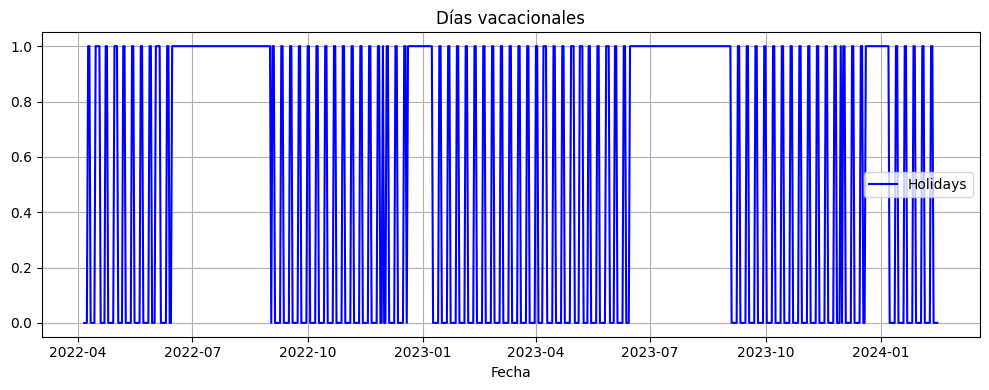

In [412]:
plt.figure(figsize=(10, 4))
plt.plot(data['datetime'], data['Holidays'], label='Holidays', color='blue')
plt.xlabel('Fecha')
plt.title('Días vacacionales')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

# Division de datos

Division de datos

In [324]:
# Divide los datos en entrenamiento (80%) y prueba (20%)
train_size = 0.8
split_index = int(len(data) * train_size)

train_data = data.iloc[:split_index]
test_data = data.iloc[split_index:]

# Verifica las dimensiones de los conjuntos de entrenamiento y prueba
print("Número de filas en datos de entrenamiento:", len(train_data))
print("Número de filas en datos de prueba:", len(test_data))

Número de filas en datos de entrenamiento: 543
Número de filas en datos de prueba: 136


# ARIMA model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

Perform the ADF Test

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test on PAX_ESTANCIAS
result = adfuller(data['PAX_ESTANCIAS'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -5.204580295756969
p-value: 8.604738749480318e-06


ACF AND PACF to determine valor p and q

In [ ]:
# Definir los rangos para p y q
p_range = range(0, 3)  # Por ejemplo, consideramos p = 0, 1, 2
q_range = range(0, 3)  # Por ejemplo, consideramos q = 0, 1, 2

# Inicializar listas para almacenar resultados de AIC y BIC
results_aic = []
results_bic = []

# Ajustar modelos ARIMA para cada combinación de p y q
for p in p_range:
    for q in q_range:
        try:
            model = ARIMA(train_data['PAX_ESTANCIAS'],
                          order=(p, 0, q), # d=0 porque los datos ya son estacionarios
                          exog=train_data[['TempAverageTNF', 'tempC_DE', 'tempC_UK', 'Week', 'Holidays']])
            model_fit = model.fit()
            results_aic.append((p, q, model_fit.aic))
            results_bic.append((p, q, model_fit.bic))
        except:
            continue

# Seleccionar el modelo con el menor AIC y BIC
best_model_aic = min(results_aic, key=lambda x: x[2])
best_model_bic = min(results_bic, key=lambda x: x[2])
print(results_aic)
print(results_bic)
print("Mejor modelo según AIC:", best_model_aic)
print("Mejor modelo según BIC:", best_model_bic)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

[(0, 0, 7378.759486566665), (0, 1, 7077.135776583782), (0, 2, 6967.556936289622), (1, 0, 6837.825984028372), (1, 1, 6827.61438236683), (1, 2, 6829.097777681951), (2, 0, 6829.6644490691615), (2, 1, 6831.548251666323), (2, 2, 6832.638603018026)]
[(0, 0, 7408.839251806203), (0, 1, 7111.512651143254), (0, 2, 7006.230920169028), (1, 0, 6872.202858587843), (1, 1, 6866.2883662462355), (1, 2, 6872.06887088129), (2, 0, 6868.338432948567), (2, 1, 6874.519344865663), (2, 2, 6879.906805537299)]
Mejor modelo según AIC: (1, 1, 6827.61438236683)
Mejor modelo según BIC: (1, 1, 6866.2883662462355)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Entrenamiento de ARIMA con variables exogenos - Temperatura

In [ ]:
# Definir el modelo ARIMA con variables exógenas
model = ARIMA(train_data['PAX_ESTANCIAS'],
              order=(1, 0, 1),
              exog=train_data[['TempAverageTNF', 'tempC_DE', 'tempC_UK', 'Week', 'Holidays']])

# Ajustar el modelo ARIMA
model_fit = model.fit()

# Realizar predicciones
start_index = len(train_data)
end_index = start_index + len(test_data) - 1
forecast = model_fit.predict(start=start_index, end=end_index,
                             exog=test_data[['TempAverageTNF', 'tempC_DE', 'tempC_UK', 'Week', 'Holidays']], typ='levels')

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Calcular error

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['PAX_ESTANCIAS'], forecast))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 162.4270065551866


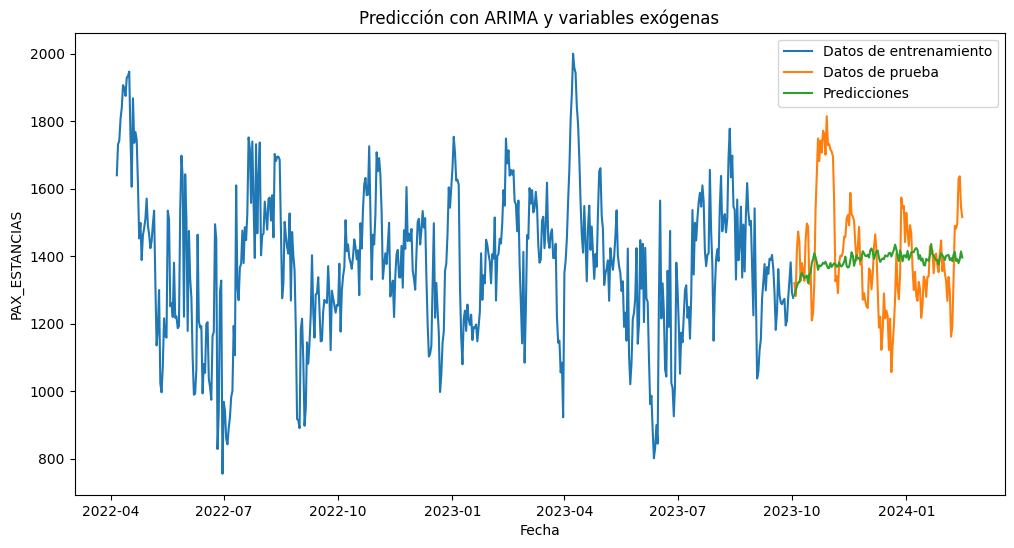

In [ ]:
# Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.plot(train_data['datetime'], train_data['PAX_ESTANCIAS'], label='Datos de entrenamiento')
plt.plot(test_data['datetime'], test_data['PAX_ESTANCIAS'], label='Datos de prueba')
plt.plot(test_data['datetime'], forecast, label='Predicciones')
plt.title('Predicción con ARIMA y variables exógenas')
plt.xlabel('Fecha')
plt.ylabel('PAX_ESTANCIAS')
plt.legend()
plt.show()

# SARIMAX Model

In [325]:
import itertools
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [326]:
def SARIMAX_search(data, exog):
    p=q=range(0,3)
    s=[12]
    d=[0]
    D=[1]
    PDQs = list(itertools.product(p, D, q, s))
    pdq = list(itertools.product(p, d, q))

    params = []
    seasonal_params = []
    results = []
    grid = pd.DataFrame()

    PDQs=list(itertools.product(p,D,q,s))#itertools.product()
    pdq=list(itertools.product(p,d,q))
    params=[]
    seasonal_params=[]
    results=[]
    grid=pd.DataFrame()
    for param in pdq:
        for seasonal_param in PDQs:
            mod= sm.tsa.SARIMAX(data,order=param,seasonal_order=seasonal_param, exog=exog,
                            enforce_stationarity=False, enforce_invertibility=False)
            result=mod.fit()
            print(f"SARIMAX{param}x{seasonal_param} - AIC:{result.aic} - BIC:{result.bic}")
            params.append(param)
            seasonal_params.append(seasonal_param)
            results.append((result.aic, result.bic))

    grid['pdq'] = params
    grid["PDQs"]=seasonal_params
    grid['AIC'] = [r[0] for r in results]
    grid['BIC'] = [r[1] for r in results]

    best_aic_model = grid.loc[grid['AIC'].idxmin()]
    best_bic_model = grid.loc[grid['BIC'].idxmin()]

    print(f"Mejor modelo según AIC: {best_aic_model}")
    print(f"Mejor modelo según BIC: {best_bic_model}")

SARIMAX_search(data['PAX_ESTANCIAS'], data[['TempAverageTNF', 'tempC_DE', 'tempC_UK','Holidays']])

SARIMAX(0, 0, 0)x(0, 1, 0, 12) - AIC:9299.343843049897 - BIC:9321.8502914026
SARIMAX(0, 0, 0)x(0, 1, 1, 12) - AIC:8864.933078703943 - BIC:8891.831722812687
SARIMAX(0, 0, 0)x(0, 1, 2, 12) - AIC:8650.403705680372 - BIC:8681.6558238062
SARIMAX(0, 0, 0)x(1, 1, 0, 12) - AIC:9019.452550722875 - BIC:9046.360362136687
SARIMAX(0, 0, 0)x(1, 1, 1, 12) - AIC:8851.000379263207 - BIC:8882.382130723407
SARIMAX(0, 0, 0)x(1, 1, 2, 12) - AIC:8648.761100874824 - BIC:8684.477807304344
SARIMAX(0, 0, 0)x(2, 1, 0, 12) - AIC:8827.431799495234 - BIC:8858.694812564898
SARIMAX(0, 0, 0)x(2, 1, 1, 12) - AIC:8666.385988827737 - BIC:8702.115146621638
SARIMAX(0, 0, 0)x(2, 1, 2, 12) - AIC:8651.077399798716 - BIC:8691.258694531925
SARIMAX(0, 0, 1)x(0, 1, 0, 12) - AIC:8945.464957733922 - BIC:8972.463679977858
SARIMAX(0, 0, 1)x(0, 1, 1, 12) - AIC:8472.384510963566 - BIC:8503.7555508685
SARIMAX(0, 0, 1)x(0, 1, 2, 12) - AIC:8285.322251737087 - BIC:8321.026487392452
SARIMAX(0, 0, 1)x(1, 1, 0, 12) - AIC:8662.642517768161 - B

In [327]:
# Definir los conjuntos de parámetros
param1 = (1, 0, 2)
seasonal_param1 = (1, 1, 2, 12)

param2 = (1, 0, 2)
seasonal_param2 = (0, 1, 2, 12)

In [328]:
# Ajustar el primer modelo SARIMAX
mod1 = sm.tsa.statespace.SARIMAX(train_data['PAX_ESTANCIAS'],
                                 order=param1,
                                 seasonal_order=seasonal_param1,
                                 exog=train_data[['TempAverageTNF', 'tempC_DE', 'tempC_UK','Holidays']])
result1 = mod1.fit()

# Hacer predicciones con el primer modelo
forecast1 = result1.predict(start=test_data.index[0], end=test_data.index[-1],
                            exog=test_data[['TempAverageTNF', 'tempC_DE', 'tempC_UK','Holidays']])
test_data['Forecast1'] = forecast1

In [329]:
# Evaluar el primer modelo
rmse1 = np.sqrt(mean_squared_error(test_data['PAX_ESTANCIAS'], forecast1))
print(f"Root Mean Squared Error (RMSE) del primer modelo: {rmse1}")

Root Mean Squared Error (RMSE) del primer modelo: 166.64792631849824


In [330]:
# Ajustar el segundo modelo SARIMAX
mod2 = sm.tsa.statespace.SARIMAX(train_data['PAX_ESTANCIAS'],
                                 order=param2,
                                 seasonal_order=seasonal_param2,
                                 exog=train_data[['TempAverageTNF', 'tempC_DE', 'tempC_UK','Holidays']])
result2 = mod2.fit()

# Hacer predicciones con el segundo modelo
forecast2 = result2.predict(start=test_data.index[0], end=test_data.index[-1],
                            exog=test_data[['TempAverageTNF', 'tempC_DE', 'tempC_UK','Holidays']])
test_data['Forecast2'] = forecast2

In [331]:
# Evaluar el segundo modelo
rmse2 = np.sqrt(mean_squared_error(test_data['PAX_ESTANCIAS'], forecast2))
print(f"Root Mean Squared Error (RMSE) del segundo modelo: {rmse2}")

Root Mean Squared Error (RMSE) del segundo modelo: 161.65730049036466


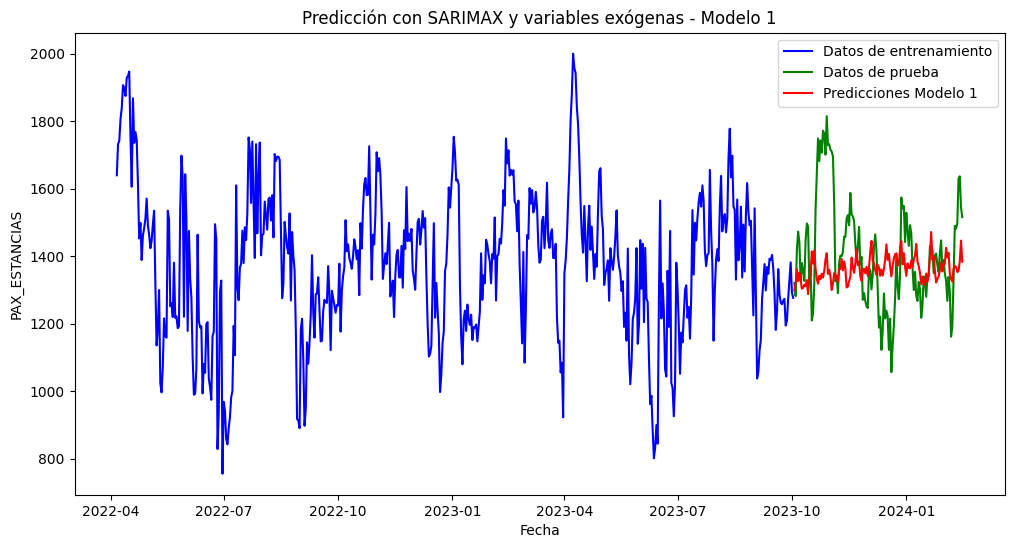

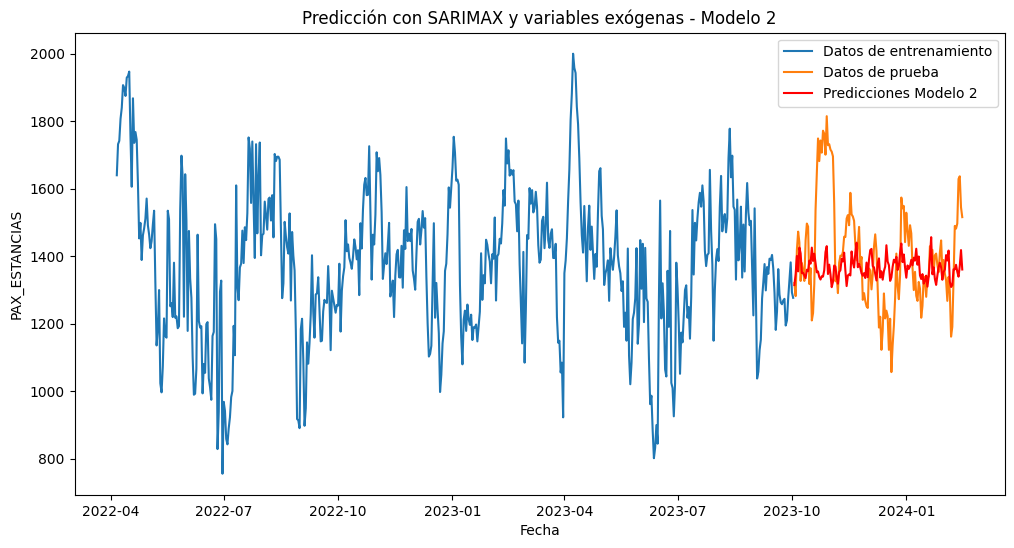

In [332]:
# Visualización de los resultados del primer modelo SARIMAX
plt.figure(figsize=(12, 6))
plt.plot(train_data['datetime'], train_data['PAX_ESTANCIAS'], label='Datos de entrenamiento', color='blue')
plt.plot(test_data['datetime'], test_data['PAX_ESTANCIAS'], label='Datos de prueba', color='green')
plt.plot(test_data['datetime'], forecast1, label='Predicciones Modelo 1', color='red')
plt.title('Predicción con SARIMAX y variables exógenas - Modelo 1')
plt.xlabel('Fecha')
plt.ylabel('PAX_ESTANCIAS')
plt.legend()
plt.show()

# Visualización de los resultados del segundo modelo SARIMAX
plt.figure(figsize=(12, 6))
plt.plot(train_data['datetime'], train_data['PAX_ESTANCIAS'], label='Datos de entrenamiento')
plt.plot(test_data['datetime'], test_data['PAX_ESTANCIAS'], label='Datos de prueba')
plt.plot(test_data['datetime'], forecast2, label='Predicciones Modelo 2', color='red')
plt.title('Predicción con SARIMAX y variables exógenas - Modelo 2')
plt.xlabel('Fecha')
plt.ylabel('PAX_ESTANCIAS')
plt.legend()
plt.show()

# LSTM V2

In [413]:
data

,datetime,PAX_ESTANCIAS,TempAverageTNF,tempC_DE,tempC_UK,Week,Holidays
0,2022-04-06,1640,17.6,10.3,11.0,3,0
1,2022-04-07,1732,17.6,10.4,10.2,4,0
2,2022-04-08,1742,18.7,7.1,7.4,5,0
3,2022-04-09,1807,18.2,5.6,7.9,6,1
4,2022-04-10,1840,17.8,4.9,9.0,7,1
5,2022-04-11,1907,19.6,7.0,11.7,1,0
6,2022-04-12,1899,19.0,9.4,14.0,2,0
7,2022-04-13,1875,20.2,13.8,14.1,3,0
8,2022-04-14,1929,20.2,12.4,14.2,4,0
9,2022-04-15,1934,19.4,8.4,15.3,5,1


In [414]:
# Display all rows
pd.set_option('display.max_rows', None)
data

,datetime,PAX_ESTANCIAS,TempAverageTNF,tempC_DE,tempC_UK,Week,Holidays
0,2022-04-06,1640,17.6,10.3,11.0,3,0
1,2022-04-07,1732,17.6,10.4,10.2,4,0
2,2022-04-08,1742,18.7,7.1,7.4,5,0
3,2022-04-09,1807,18.2,5.6,7.9,6,1
4,2022-04-10,1840,17.8,4.9,9.0,7,1
5,2022-04-11,1907,19.6,7.0,11.7,1,0
6,2022-04-12,1899,19.0,9.4,14.0,2,0
7,2022-04-13,1875,20.2,13.8,14.1,3,0
8,2022-04-14,1929,20.2,12.4,14.2,4,0
9,2022-04-15,1934,19.4,8.4,15.3,5,1


In [415]:
data = data.drop(['Week'], axis=1)

Epoch 1/50
17/17 [==============================] - 2s 18ms/step - loss: 1051491.2500
Epoch 2/50
17/17 [==============================] - 0s 18ms/step - loss: 70007.3359
Epoch 3/50
17/17 [==============================] - 0s 20ms/step - loss: 47483.6797
Epoch 4/50
17/17 [==============================] - 0s 17ms/step - loss: 45914.8906
Epoch 5/50
17/17 [==============================] - 0s 17ms/step - loss: 45185.3008
Epoch 6/50
17/17 [==============================] - 0s 20ms/step - loss: 47995.6992
Epoch 7/50
17/17 [==============================] - 0s 16ms/step - loss: 46923.6953
Epoch 8/50
17/17 [==============================] - 0s 16ms/step - loss: 46237.6406
Epoch 9/50
17/17 [==============================] - 0s 20ms/step - loss: 48213.5391
Epoch 10/50
17/17 [==============================] - 0s 17ms/step - loss: 47281.9141
Epoch 11/50
17/17 [==============================] - 0s 17ms/step - loss: 45845.7031
Epoch 12/50
17/17 [==============================] - 0s 20ms/step - loss

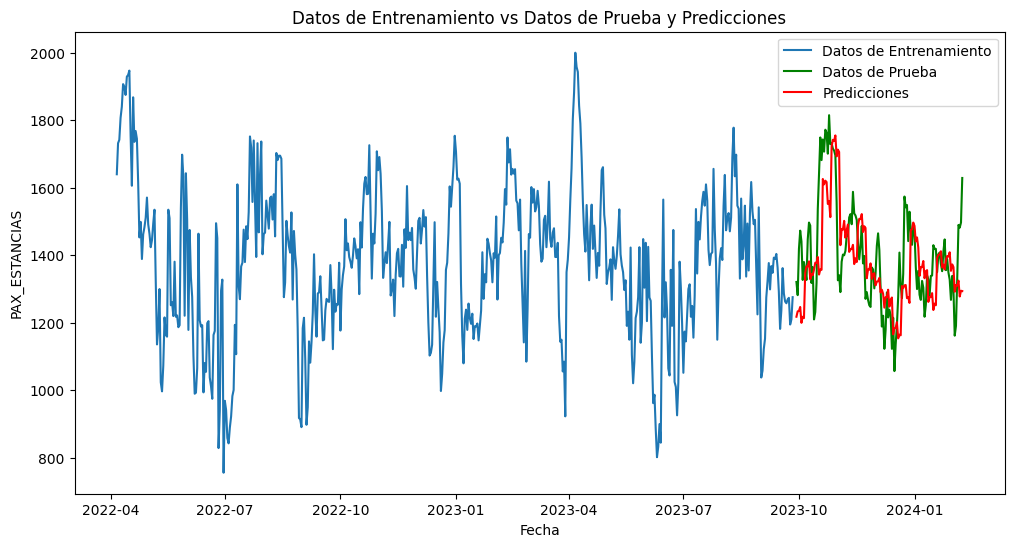

In [416]:
# univariate multi-step lstm
from math import sqrt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

# Dependiendo de qué librería tengan instalada
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM

# Set the 'datetime' column as the index
data.set_index('datetime', inplace=True)

# Function to split the dataset into train and test sets with 80-20 split
def split_dataset(data):
    # Calculate the index for the 80% split
    train_size = int(len(data) * 0.8)

    # Split the data into training and testing sets
    train, test = data[:train_size], data[train_size:]

    # Ensure the length of train and test sets is a multiple of 7
    train = train[:len(train) - (len(train) % 7)]
    test = test[:len(test) - (len(test) % 7)]

    # Reshape the data into blocks of seven days
    train = np.array(np.split(train, len(train) // 7))
    test = np.array(np.split(test, len(test) // 7))

    return train, test

# Evaluamos los datos que hemos predicho en comparación a los de verdad
def evaluate_forecasts(actual, predicted):
    scores = list()
    # calcula el RMSE por día
    for i in range(actual.shape[1]):
        # calcula MSE
        mse = mean_squared_error(actual[:, i], predicted[:, i])
        # calcula RMSE, que es la raíz cuadrada del MSE
        rmse = sqrt(mse)
        scores.append(rmse)

    # calcula el RMSE medio. Para ello recorremos todos los valores que tiene.
    # Forma manual
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = sqrt(s / (actual.shape[0] * actual.shape[1]))
# Following the sklearn method. It doesn't matter which one you choose
#     score = mean_squared_error(np.array(actual).flatten(),
#                                np.array(predicted).flatten())

    return score, scores

# Imprimimos los valores
def summarize_scores(name, score, scores):
    s_scores = ', '.join(['%.1f' % s for s in scores])
    print('%s: [%.3f] %s' % (name, score, s_scores))

# Transform train data to LSTM model data to train model
def to_supervised(train, n_input, n_out=7):
    # Reshape the data dimensions
    data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
    x, y = list(), list()
    in_start = 0
    # Iterate through all data points
    for _ in range(len(data)):
        # Define the end of the input sequence and the end of the output sequence
        # By default, we predict 7 days
        in_end = in_start + n_input
        out_end = in_end + n_out
        # Ensure the output sequence does not exceed the total dataset length
        if out_end <= len(data):
            x_input = data[in_start:in_end, 0]
            x_input = x_input.reshape((len(x_input), 1))
            x.append(x_input)
            y.append(data[in_end:out_end, 0])
        # Move the start of the next input sequence to the next day
        in_start += 1
    return np.array(x), np.array(y)

def build_model(train, n_input):
    train_x, train_y = to_supervised(train, n_input)
    # Definimos los parámetros
    # Verbose = 1 es si queremos ver el entreno ejecutarse
    verbose, epochs, batch_size = 1, 50, 32
    n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
    # Definimos el model. Cada add equivale a añadir una capa
    model = Sequential()
    model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs))
    model.compile(loss='mse', optimizer='adam')

    # Entrenamos la red
    model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
    return model

def forecast(model, history, n_input):
    # Reshepeamos los datos porque queremos dos dimensiones
    data = np.array(history)
    data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))

    # Cogemos las últimas n_inputs observaciones
    input_x = data[-n_input:, 0]

    # reshapeamos en (1,n_input)
    input_x = input_x.reshape((1, len(input_x), 1))

    # Predecimos el número de inputos siguientes.
    yhat = model.predict(input_x, verbose=0)

    # las dimensiones devueltas son (1,7).
    # Por como tenemos el código sólo queremos
    # la segunda dimensión, es decir, la
    # la fila dentro de la columna
    yhat = yhat[0]

    return yhat

# Evaluamos cada modelo con una validación Walk-Forward
def evaluate_model(train, test, n_input):

    # Entrenamos el modelo
    model = build_model(train, n_input)

    # history es la lista de los datos de cada semana
    history = [x for x in train]

    # Validación walk-forward de cada semana
    predictions = list()
    for i in range(len(test)):
        # predecimos
        yhat_sequence = forecast(model, history, n_input)

        # Almacenamos la predicción
        predictions.append(yhat_sequence)
        # Añadimos a la historia los datos de la siguiente semana para seguir prediciendo
        history.append(test[i, :])

    predictions = np.array(predictions)
    real = test[:, :, 0]
    # Evaluamos la prediccion para cada semana, usando las predicciones y los datos reales
    score, scores = evaluate_forecasts(real, predictions)
    return score, scores, predictions

# Assuming 'data' is a DataFrame with the necessary data and 'data.values' provides the appropriate numpy array
train, test = split_dataset(data.values)

# Convert the array to standard notation and print it
np.set_printoptions(suppress=True)  # This suppresses scientific notation

# Evaluamos el modelo y obtenemos los datos
n_input = 7
score, scores, predictions = evaluate_model(train, test, n_input)

# Imprimimos el error
summarize_scores('lstm', score, scores)

# Datos de entrenamiento y test (asumiendo que train y test tienen la misma longitud)
train_real = train[:, :, 0]  # Datos reales del entrenamiento
test_real = test[:, :, 0]    # Datos reales de prueba

# Convertir a arrays numpy y asegurarse de que sean enteros
train_re = np.array(train_real.flatten(), dtype=int)
test_re = np.array(test_real.flatten(), dtype=int)
pre = np.array(predictions.flatten(), dtype=int)

# Generar una serie de fechas comenzando desde 2022-04-06 para train y 2023-10-03 para test con la misma longitud que tus datos
start_date_train = '2022-04-06'
start_date_test = '2023-09-29'

dates_train = pd.date_range(start=start_date_train, periods=len(train_re), freq='D')
dates_test = pd.date_range(start=start_date_test, periods=len(test_re), freq='D')

# Crear la figura
plt.figure(figsize=(12, 6))

# Graficar los datos de entrenamiento
plt.plot(dates_train, train_re, label='Datos de Entrenamiento')

# Graficar los datos de prueba y las predicciones
plt.plot(dates_test, test_re, label='Datos de Prueba', color='green')
plt.plot(dates_test, pre, label='Predicciones', color='red')

# Añadir etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('PAX_ESTANCIAS')
plt.title('Datos de Entrenamiento vs Datos de Prueba y Predicciones')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()